# **Modelos Autoregresivos**
1.   Implemente una clase para un modelo Autoregresivo de orden p.
2.   Implemente un método para inicializar el modelo autoregresivo. Este método recibirá un parámetro que deben ser los valores iniciales de los parámetros. En caso de que no se provea este parámetro se asignarán valores aleatorios a los valores de los parámetros.
3. Implemente un método que imprima el polinomio asociado al modelo AR. (*)
4. Implemente un método que le permita realizar una simulación del modelo autoregresivo dados p valores iniciales y t pasos en la simulación.
5. Pruebe el funcionamiento de su clase probando los fenómenos observados en clase: el caso AR(1) cuando phi es positivo, negativo y cuando es mayor a 1.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf
import re

In [ ]:
elctricidad = pd.read_csv("/content/consumo_electricidad.csv")
print(elctricidad)

           Fecha  Consumo_Electricidad
0     2020-01-01            506.927401
1     2020-01-02            496.326312
2     2020-01-03            495.324197
3     2020-01-04            502.001669
4     2020-01-05            503.787590
...          ...                   ...
1090  2022-12-26            554.986555
1091  2022-12-27            544.398296
1092  2022-12-28            550.527186
1093  2022-12-29            552.645713
1094  2022-12-30            554.498254

[1095 rows x 2 columns]


In [ ]:
#Haciendo estacioanria la serie de tiempo
columnas_a_escalas = ['Consumo_Electricidad']
datos_a_escalas = elctricidad[columnas_a_escalas]
escalador = StandardScaler()
datos_escalados = escalador.fit_transform(datos_a_escalas)
df_escalado = pd.DataFrame(datos_escalados, columns=columnas_a_escalas)
elctricidad_diferenciado = df_escalado.diff().dropna()

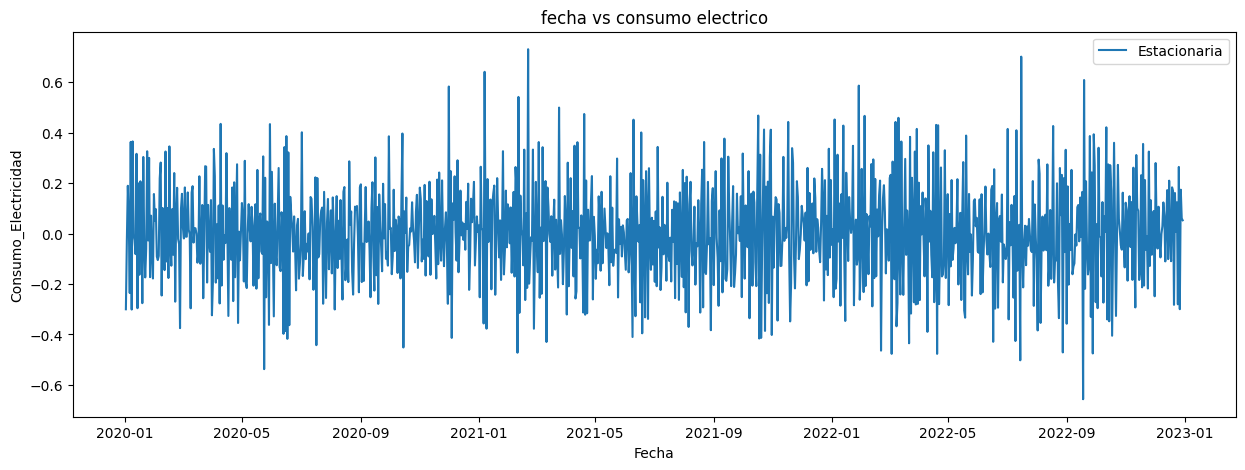

In [ ]:
elctricidad['Fecha'] = pd.to_datetime(elctricidad['Fecha'])
_fig_, _axs_ = plt.subplots(nrows = 1, figsize = (15, 5))
_fig_.subplots_adjust(hspace = 0.3, wspace = 0.3)
_axs_.set(title = "fecha vs consumo electrico")
_ = sns.lineplot(x = elctricidad["Fecha"], y = elctricidad_diferenciado['Consumo_Electricidad'], label = "Estacionaria", ax = _axs_)

In [ ]:
print(elctricidad_diferenciado)

      Consumo_Electricidad
1                -0.300205
2                -0.028378
3                 0.189094
4                 0.050574
5                -0.235797
...                    ...
1090              0.263722
1091             -0.299841
1092              0.173560
1093              0.059993
1094              0.052461

[1094 rows x 1 columns]


**1.   Implemente una clase para un modelo Autoregresivo de orden p.**

In [ ]:
#params_phi: son todos los coeficientes del modelo de orden p
#alpha_const: una constante que forma parte del modelo autoregresivo
#p es el orden del modelo
#valor_serie: caracteristicas sobre la serie de tiempo en la cual queremos hacer el modelo

#Clase del modelo autoregresivo
class ModeloAutoregresivo:

  def __init__(self, p, alpha_const = 0, params_phi = None):
    self.p = p
    self.alpha_const = alpha_const

    if params_phi is not None:
      self.params_phi = params_phi

    else:
      self.params_phi = np.random.rand(p)

  def modelo_autoregresivo_p(self, valor_serie,t):
    suma_val = 0
    ruido = np.random.normal(0,1,1)
    #print(self.params_phi)
    self.params_phi= list(self.params_phi)
    for i,valor_phi in enumerate(self.params_phi):
      #comprobar que haya valores anteriores
      if t >= self.p:
        suma_val += valor_phi*valor_serie[t-(i+1)]
    Xt = self.alpha_const + suma_val + ruido
    return Xt

  def mostrar_polinomio(self, params_phi):
    self.params_phi = params_phi
    inicio_polinom =  f"X_t = 1"

    for i, valor_phi in enumerate(self.params_phi):
      inicio_polinom += f" - {valor_phi} z**{i+1}"

    #para extraer los coeficientes de la cadena
    #coeficientes = [float(match.group(0)) for match in re.finditer(r"[-+]?\d*\.\d+|\d+", inicio_polinom)]

    #Obtener las raíces despues de haber extraido las raices
    params_phi = np.flip(params_phi)
    params_phi = params_phi * -1
    params_phi = np.append(params_phi,1)
    print(params_phi)
    raices = np.roots(params_phi)
    return inicio_polinom, raices

  #verificar si se cumple que las raices, su valor absoluto es mayor a 1
  def es_causal(self,raices):
    for i in raices:
      if abs(i) > 1:
        print(f"La raíz {i} cumple con la condición (|raíz| > 1)")
      else:
        print(f"La raíz {i} no cumple con la condición (|raíz| > 1)")


In [ ]:
p = 2
alpha_const = 0
params_phi_1 = [7/3,2/3]


modelo_arp = ModeloAutoregresivo(p, alpha_const, params_phi_1)

valores_pos = []
temp = list(elctricidad_diferenciado.iloc[0:1094,0])
for i in range(200):
  Xt = modelo_arp.modelo_autoregresivo_p(temp, 1094 + i)
  temp.append(Xt)
print(temp)


[-0.3002045443488054, -0.02837815051003545, 0.18909448042034627, 0.050574185158445806, -0.23579732993157054, 0.3628199343988794, -0.3012944759241891, 0.3648934998586355, -0.004692243727884682, -0.02654152100633911, -0.0816798843237182, 0.31577464545031664, -0.29599583243641847, 0.19865638934011548, -0.16354657301562386, 0.20691074493507927, 0.1786745737634014, -0.27601255502936767, 0.30325346396520403, -0.05135444935846331, -0.17395687248155228, -0.06053609450145475, 0.3258723153220636, -0.02766068953361761, 0.29943886099480876, -0.17276993801397947, 0.07068138878619033, -0.07971690871131204, -0.1782401747835091, 0.15648816788367856, 0.05085209613965934, 0.09657467670679633, -0.09156515220603334, -0.10525320127538389, -0.08874781531365826, 0.21858910684778696, 0.28112439055340366, -0.24566678073360934, 0.1011004829611073, -0.06677069553898193, -0.14503067223485785, 0.3248890852919089, -0.1107313326923951, 0.10084767050643234, -0.17628883973238824, 0.3451525218627987, -0.049090995138185

In [ ]:
p = 2
alpha_const = 0
params_phi = [0,1/3]


modelo_arp_2 = ModeloAutoregresivo(p, alpha_const, params_phi)

valores_pos_2 = []
temp = list(elctricidad_diferenciado.iloc[0:1094,0])
for i in range(200):
  Xt = modelo_arp_2.modelo_autoregresivo_p(temp, 1094 + i)
  temp.append(Xt)
print(temp)

[-0.3002045443488054, -0.02837815051003545, 0.18909448042034627, 0.050574185158445806, -0.23579732993157054, 0.3628199343988794, -0.3012944759241891, 0.3648934998586355, -0.004692243727884682, -0.02654152100633911, -0.0816798843237182, 0.31577464545031664, -0.29599583243641847, 0.19865638934011548, -0.16354657301562386, 0.20691074493507927, 0.1786745737634014, -0.27601255502936767, 0.30325346396520403, -0.05135444935846331, -0.17395687248155228, -0.06053609450145475, 0.3258723153220636, -0.02766068953361761, 0.29943886099480876, -0.17276993801397947, 0.07068138878619033, -0.07971690871131204, -0.1782401747835091, 0.15648816788367856, 0.05085209613965934, 0.09657467670679633, -0.09156515220603334, -0.10525320127538389, -0.08874781531365826, 0.21858910684778696, 0.28112439055340366, -0.24566678073360934, 0.1011004829611073, -0.06677069553898193, -0.14503067223485785, 0.3248890852919089, -0.1107313326923951, 0.10084767050643234, -0.17628883973238824, 0.3451525218627987, -0.049090995138185

**3. Implemente un método que imprima el polinomio asociado al modelo AR. ()**

In [ ]:
#para imprimir el polinomio asociado al modelo autoregresivo
polinomio, raices = modelo_arp.mostrar_polinomio(params_phi_1)
print("Polinomio: ", polinomio)
print("raices: ", raices)
print(type(raices))
modelo_arp.es_causal(raices)


[-0.66666667 -2.33333333  1.        ]
Polinomio:  X_t = 1 - 2.3333333333333335 z**1 - 0.6666666666666666 z**2
raices:  [-3.88600094  0.38600094]
<class 'numpy.ndarray'>
La raíz -3.886000936329383 cumple con la condición (|raíz| > 1)
La raíz 0.38600093632938276 no cumple con la condición (|raíz| > 1)


In [ ]:
polinomio, raices = modelo_arp_2.mostrar_polinomio(params_phi)
print("Polinomio: ", polinomio)
print("raices: ", raices)
print(type(raices))
modelo_arp_2.es_causal(raices)

[-0.33333333 -0.          1.        ]
Polinomio:  X_t = 1 - 0 z**1 - 0.3333333333333333 z**2
raices:  [-1.73205081  1.73205081]
<class 'numpy.ndarray'>
La raíz -1.7320508075688772 cumple con la condición (|raíz| > 1)
La raíz 1.7320508075688776 cumple con la condición (|raíz| > 1)


**4. Implemente un método que le permita realizar una simulación del modelo autoregresivo dados p valores iniciales y t pasos en la simulación.**

**5. Pruebe el funcionamiento de su clase probando los fenómenos observados en clase: el caso AR(1) cuando phi es positivo, negativo y cuando es mayor a 1.**

In [ ]:
params_phi = np.random.rand(1)
print(params_phi)

[0.64275667]


In [ ]:
p = 1
alpha_const = 0
params_phi = [0.9]
modelo_arp = ModeloAutoregresivo(p, alpha_const,params_phi)

valores_pos = []
temp = list(elctricidad_diferenciado.iloc[0:1094,0])
for i in range(200):
  Xt = modelo_arp.modelo_autoregresivo_p(temp, 1094 + i)
  temp.append(Xt)
  valores_pos.append(Xt)

In [ ]:
print(valores_pos)

[array([1.37812533]), array([-1.62012064]), array([-2.22236059]), array([-1.08730231]), array([-1.55617122]), array([-1.16696631]), array([-1.46806588]), array([-1.99665413]), array([-0.40730059]), array([0.82912803]), array([-0.6729414]), array([-0.06713083]), array([-0.32693724]), array([-1.88965841]), array([-0.29041374]), array([0.28842146]), array([-0.60154882]), array([0.34832608]), array([-1.22072254]), array([-0.81083718]), array([-2.29242361]), array([-1.03467352]), array([-1.36120435]), array([-0.71809667]), array([0.6696176]), array([0.09781349]), array([-0.26221942]), array([-0.21297039]), array([0.51913244]), array([1.20100157]), array([0.70194252]), array([1.46892468]), array([1.86937382]), array([2.14384715]), array([-0.10109658]), array([0.80137945]), array([-0.17702523]), array([-0.53564737]), array([-0.41710227]), array([-1.39720045]), array([-1.8527318]), array([-1.09878056]), array([-1.66640627]), array([-1.35091587]), array([-1.25969504]), array([-0.95817291]), arr

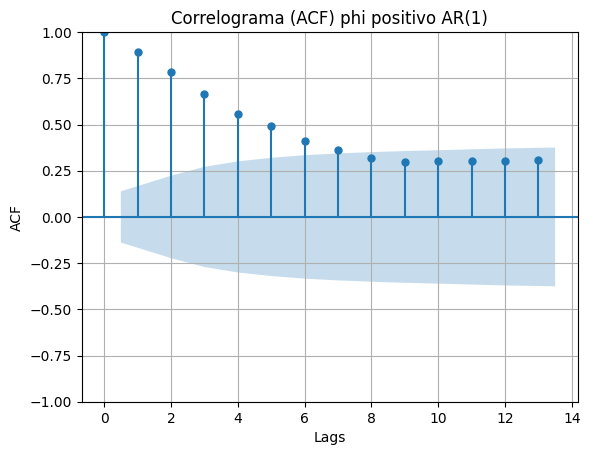

In [ ]:
plot_acf(valores_pos, lags = 13)
plt.title('Correlograma (ACF) phi positivo AR(1)')
plt.xlabel('Lags')
plt.ylabel('ACF')
plt.grid(True)
plt.show()

In [ ]:
#negativo
p = 1
ruido = np.random.normal(0,1,1)
params_phi = [-0.9]
valores_neg = []
temp = list(elctricidad_diferenciado.iloc[0:1094,0])
modelo_arp = ModeloAutoregresivo(p, alpha_const, params_phi)
for i in range(200):
  Xt = modelo_arp.modelo_autoregresivo_p(temp, 1094 + i)
  temp.append(Xt)
  valores_neg.append(Xt)

In [ ]:
print(valores_neg)

[array([-0.44974862]), array([0.00043488]), array([-1.04882175]), array([0.34742877]), array([-1.49880427]), array([0.48352885]), array([-1.10149226]), array([2.62932977]), array([-1.04678024]), array([1.02231737]), array([-1.23991076]), array([0.59725722]), array([-2.77677706]), array([3.04987324]), array([-1.68745584]), array([1.04373274]), array([-0.02665642]), array([-1.05989423]), array([0.37703795]), array([0.14545609]), array([-0.24509907]), array([-0.19072903]), array([0.08359097]), array([0.62456287]), array([-0.66697296]), array([1.11306694]), array([-2.18710836]), array([2.24999936]), array([-2.13809127]), array([1.87062955]), array([-3.03908967]), array([2.75872949]), array([-2.20907206]), array([1.02037397]), array([-1.11458708]), array([1.270673]), array([-1.25360293]), array([1.29728209]), array([-1.26756415]), array([1.71886975]), array([-1.89667844]), array([1.86789169]), array([-0.86429945]), array([0.37039402]), array([-0.40555823]), array([0.39271979]), array([-2.62

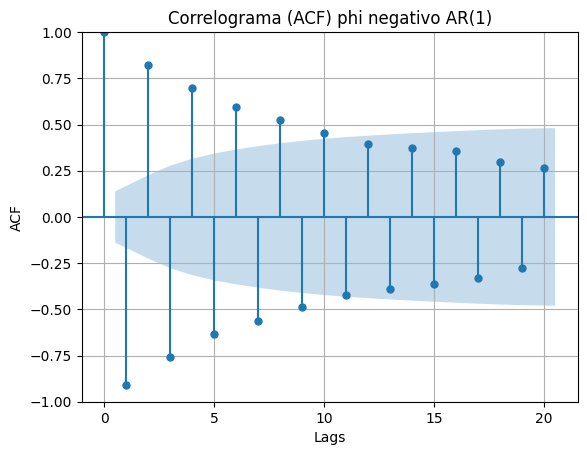

In [ ]:
plot_acf(valores_neg, lags = 20)
plt.title('Correlograma (ACF) phi negativo AR(1)')
plt.xlabel('Lags')
plt.ylabel('ACF')
plt.grid(True)
plt.show()

In [ ]:
#mayor a uno
p = 1
ruido = np.random.normal(0,1,1)
params_phi_m = [1.9]
valores_mayor = []
temp = list(elctricidad_diferenciado.iloc[0:1094,0])
modelo_arp_may = ModeloAutoregresivo(p, alpha_const, params_phi_m)
for i in range(200):
  Xt = modelo_arp_may.modelo_autoregresivo_p(temp, 1094 + i)
  temp.append(Xt)
  valores_mayor.append(Xt)

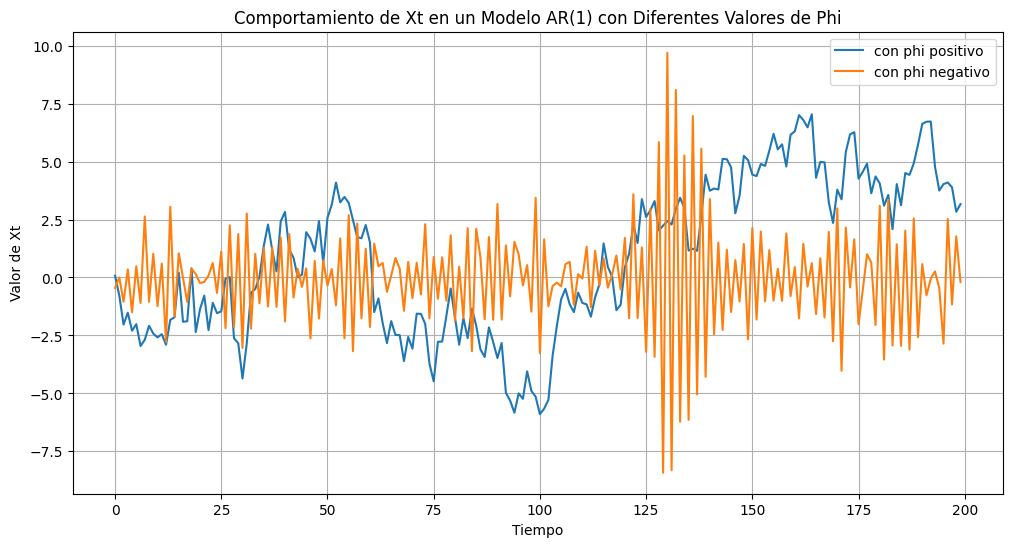

In [ ]:
# Crear una lista de tiempo con la misma longitud en todos los casos
tiempo = list(range(199 + 1))

# Graficar las predicciones en los tres casos
plt.figure(figsize=(12, 6))
plt.plot(tiempo, valores_pos, label="con phi positivo")
plt.plot(tiempo, valores_neg, label="con phi negativo")
#plt.plot(tiempo, valores_mayor, label="con phi mayor a 1")
plt.xlabel("Tiempo")
plt.ylabel("Valor de Xt")
plt.title("Comportamiento de Xt en un Modelo AR(1) con Diferentes Valores de Phi")
plt.legend()
plt.grid()
plt.show()

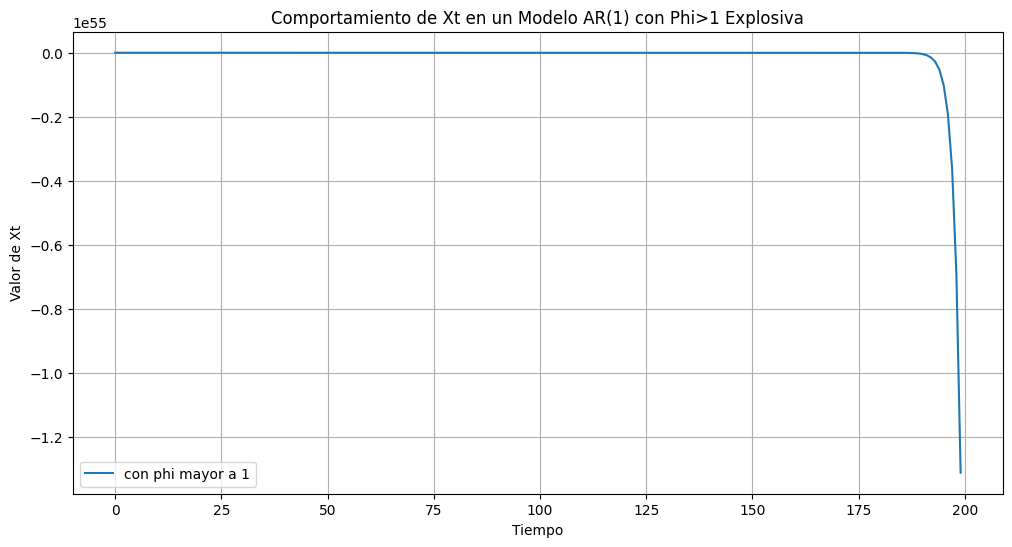

In [ ]:
plt.figure(figsize=(12, 6))

plt.plot(tiempo, valores_mayor, label="con phi mayor a 1")
plt.xlabel("Tiempo")
plt.ylabel("Valor de Xt")
plt.title("Comportamiento de Xt en un Modelo AR(1) con Phi>1 Explosiva")
plt.legend()
plt.grid()
plt.show()